In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:43:48,771 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:48,772 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:48,772 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:48,776 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:43:48,776 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:48,786 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:43:49,376 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:49,379 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:49,379 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:49,380 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:49,380 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:49,380 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:49,380 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:49,381 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:49,934 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:43:50,107 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:43:50,108 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:43:50,108 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:43:50,111 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:43:50,912 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 6
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135740225387, 864691135272164113, 864691136618403213,
       864691135974454383, 864691136134446219])


--- Working on Neuron 864691135740225387 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 456, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2067, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2523
n_valid_syn_ids_presyn = 456
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2067
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135740225387
Postsyn counts:
TP:2039
TN:0
FP:28
FN:0
Presyn counts:
TP:50
TN:0
FP:406
FN:0


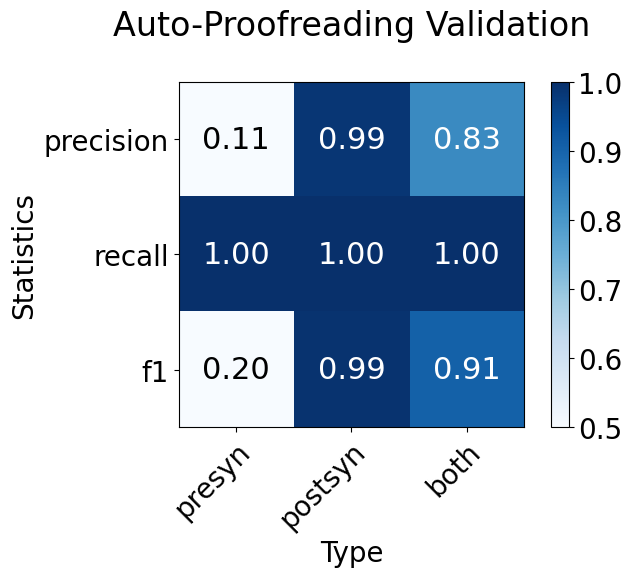

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135740225387_validation_df.pbz2
File size is 0.051576 MB
Total time for neuron 864691135740225387: 116.49666929244995

--- Working on Neuron 864691135272164113 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 214, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 5665, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5879
n_valid_syn_ids_presyn = 214
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 5665
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135272164113
Postsyn counts:
TP:5649
TN:0
FP:16
FN:0
Presyn counts:
TP:50
TN:0
FP:164
FN:0


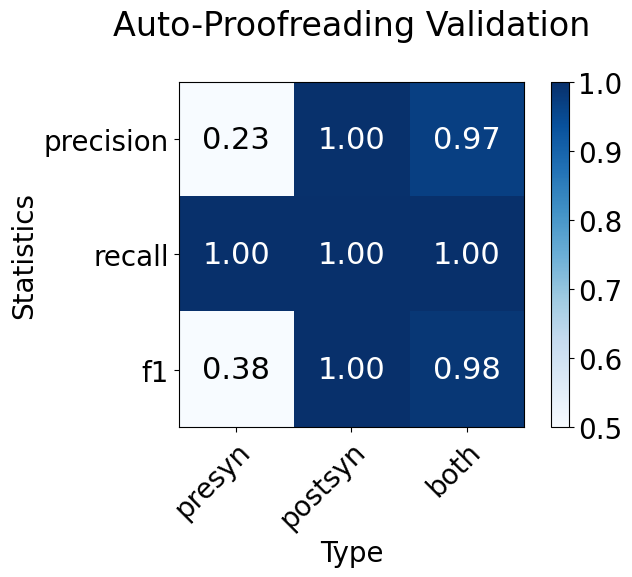

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135272164113_validation_df.pbz2
File size is 0.116246 MB
Total time for neuron 864691135272164113: 102.54046058654785

--- Working on Neuron 864691136618403213 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 107, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3083, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 107
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3083
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136618403213
Postsyn counts:
TP:3080
TN:0
FP:3
FN:0
Presyn counts:
TP:28
TN:0
FP:79
FN:0


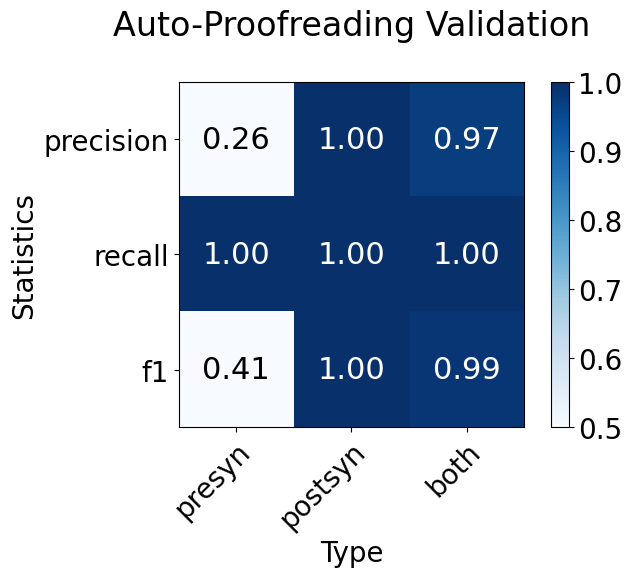

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136618403213_validation_df.pbz2
File size is 0.065042 MB
Total time for neuron 864691136618403213: 83.71277070045471

--- Working on Neuron 864691135974454383 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 707, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3654, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 707
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3654
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135974454383
Postsyn counts:
TP:3603
TN:0
FP:51
FN:0
Presyn counts:
TP:68
TN:0
FP:639
FN:0


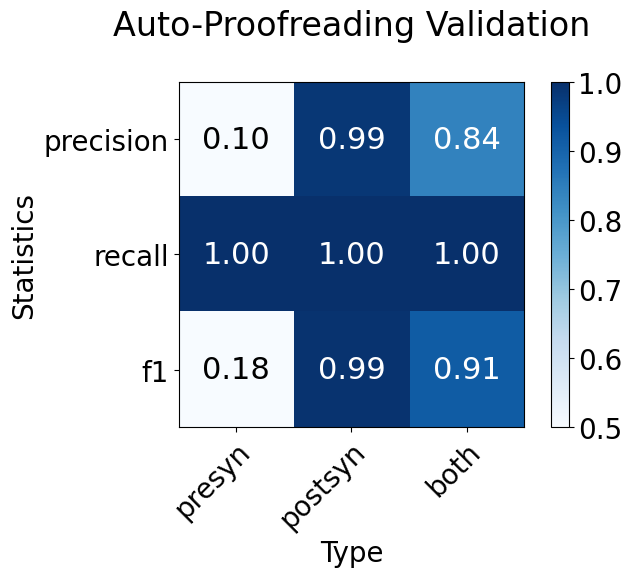

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135974454383_validation_df.pbz2
File size is 0.088477 MB
Total time for neuron 864691135974454383: 113.32604384422302

--- Working on Neuron 864691136134446219 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 383, # error synapses  = 1, # error presyns = 0
For postsyn: # valid synapses = 8034, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 8418
n_valid_syn_ids_presyn = 383
n_errored_syn_ids_presyn = 1
n_valid_syn_ids_postsyn = 8034
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136134446219
Postsyn counts:
TP:8019
TN:0
FP:15
FN:0
Presyn counts:
TP:91
TN:1
FP:292
FN:0


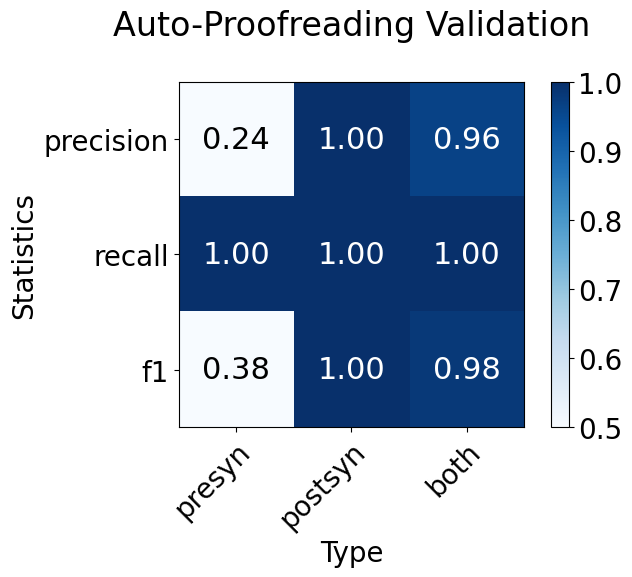

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136134446219_validation_df.pbz2
File size is 0.167036 MB
Total time for neuron 864691136134446219: 157.03056979179382


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")